<h1><center>SSP -- Assignment 6</center></h1>

In [1]:
%config InlineBackend.figure_format = 'retina' 
from math import *
import random
import numpy as np
import scipy as sp
from scipy import stats
import seaborn as sns
from scipy.optimize import newton,curve_fit
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.pyplot import figure, show

# 1

## (a)

In [2]:
#since the given pairs of alpha,beta are integers, gamma function is ~(n-1)!
def gamma(x):
    return factorial(x-1)
def beta(a,b):
    return float(gamma(a))*gamma(b)/gamma(a+b)
def pdf_p(p,l):
    a,b = l
    return 1./beta(a,b)*p**(a-1.)*(1.-p)**(b-1.)

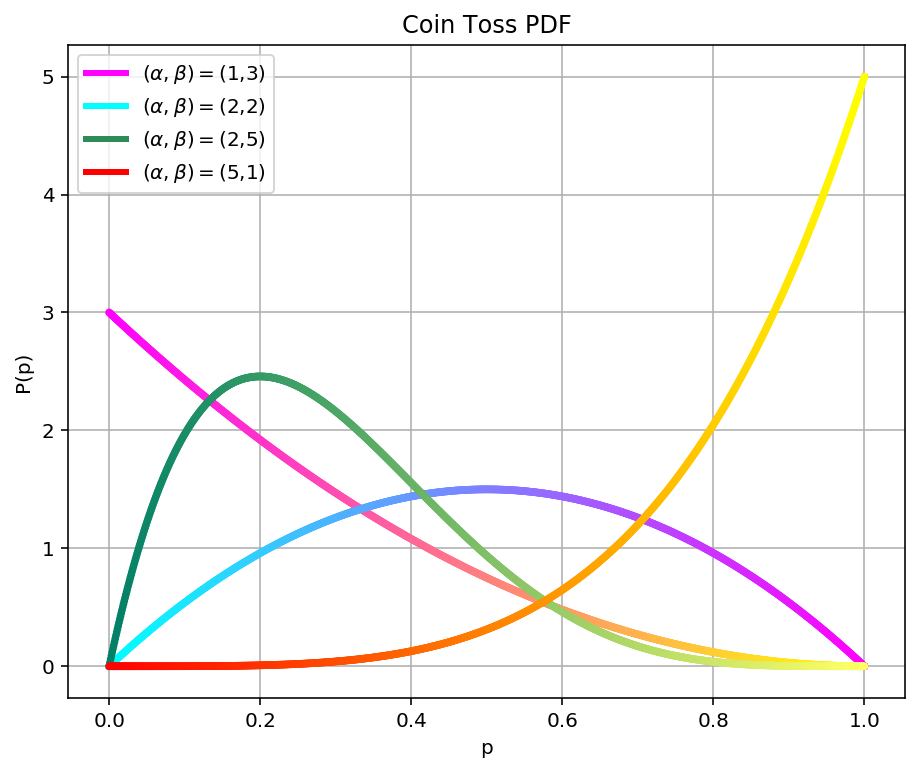

In [3]:
l = [[1,3],[2,2],[2,5],[5,1]]
mp = ['spring','cool','summer','autumn']
cl = ['fuchsia','aqua','seagreen','red']
plt.figure(figsize=(7.5,6))
for i,ll in enumerate(l):
    p = np.linspace(0.,1,1000)
    m = np.arange(len(p))
    plt.scatter(p,pdf_p(p,ll),c=m,marker='o',s=8,cmap=mp[i],zorder=2,alpha=1)
    plt.plot(p,pdf_p(p,ll),color=cl[i],alpha=1,lw=3,zorder=1,label=r'$(\alpha,\beta)=($'+str(ll[0])+','+str(ll[1])+')')
plt.title('Coin Toss PDF')
plt.xlabel('p')
plt.ylabel('P(p)')
plt.legend()
plt.grid()
plt.show()

## (b)

$x[n]$ are conditionally IID:
$$P(x|p) = \prod_{n=1}^{N}P(x[n]|p)=p^{\sum_{n=1}^Nx[n]}(1-p)^{\sum_{n=1}^N1-x[n]}=p^{N\bar{x}}(1-p)^{N(1-\bar{x})}$$
with $\bar{x}=\frac{1}{N}\sum_{n=1}^Nx[n]$.
The MAP estimator is found by maximazing:
\begin{align*}
g(p) &= \ln P(x|p)+\ln P(p)\\
&=\ln (p^{N\bar{x}}(1-p)^{N(1-\bar{x})})+\ln\left(\frac{1}{B(\alpha,\beta)}p^{\alpha-1}(1-p)^{\beta-1}\right)
\end{align*}
Now differentiate the above function w.r.t. $p$:
$$\begin{align*}
\frac{\partial g}{\partial p} &= \frac{\partial\left[N\bar{x}\ln p+N(1-\bar{x})\ln(1-p)\right]}{\partial p}+\frac{\partial \ln\left(\frac{1}{B(\alpha,\beta)}p^{\alpha-1}(1-p)^{\beta-1}\right)}{\partial p}\\
&=N\bar{x}\frac{1}{p}+N(1-\bar{x})\left(-\frac{1}{1-p}\right)+\frac{-(\alpha+\beta-2)p+\alpha-1}{(1-p)p}\\
&=\frac{N\bar{x}(1-p)-(N-N\bar{x}+\alpha+\beta-2)p+\alpha-1}{p(1-p)}
\end{align*}$$
and set it to zero yields the MAP estimator of $p$:
$$\frac{N\bar{x}(1-p)-(N-N\bar{x}+\alpha+\beta-2)p+\alpha-1}{p(1-p)}=0\implies \hat{p}_{MAP} = \frac{N\bar{x}+\alpha-1}{N+\alpha+\beta-2}=\frac{\sum_{n=1}^Nx[n]+\alpha-1}{N+\alpha+\beta-2}$$

# 2

## (a)

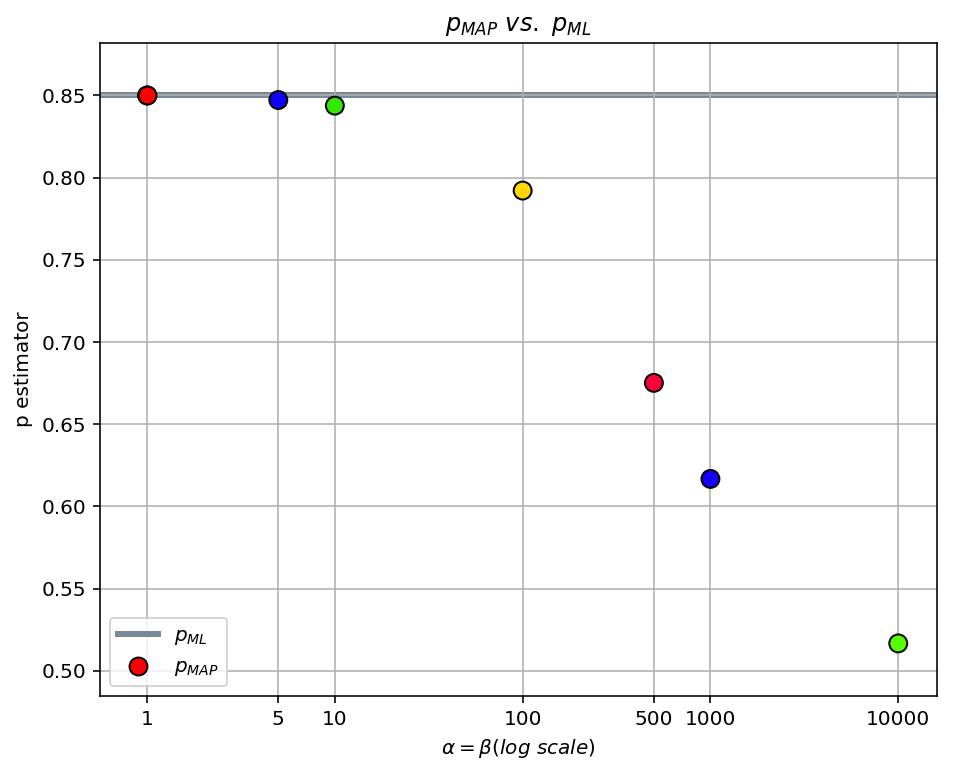

In [4]:
#x is an array of length 1000, of which 150 are zeros
N = 1000
Nb = 150
x = np.append(np.ones(N-Nb),np.zeros(Nb))
def p_map(a):
    return (np.sum(x)+a-1.)/(N+2*a-2.)
a = np.array([1.,5.,10.,100.,500.,1000.,10000.])
a_lb = ['1','5','10','100','500','1000','10000']
m = np.arange(len(a))
plt.figure(figsize=(7.5,6))
plt.scatter(np.log(a),p_map(a),c=m,marker='o',edgecolor='k',s=80,cmap='prism',zorder=2,alpha=1)
plt.scatter(np.log(a)[0],p_map(a)[0],color='red',edgecolor='k',s=80,zorder=2,alpha=1,label=r'$p_{MAP}$')
plt.axhline(y=sum(x)/N,color='lightslategray',lw=3,zorder=1,label=r'$p_{ML}$')
plt.xticks(np.log(a),a_lb)
plt.title(r'$p_{MAP} \ vs. \ p_{ML}$')
plt.xlabel(r'$\alpha=\beta(log \ scale)$')
plt.ylabel(r'p estimator')
plt.legend()
plt.grid()
plt.show()

## (b)

From the plot above, it can be seen that when $\alpha$ and $\beta$ are very small compared to the sample size, so that $\alpha=\beta\ll N$, the dependence of $\hat{p}_{MAP}$ on $\alpha$ and $\beta$ is negligible (in the plot when $\alpha<10$). However as $\alpha$ gets larger, the dependence start to play a role, $\hat{p}_{MAP}$ decreases with the increase of $\alpha$, and aymptotes to $0.5$ as $\alpha$ gets significantly larger ($\sim 10000$ in the plot). It makes sense since the expression for $\hat{p}_{MAP}$goes to $\bar{x}$ for small $\alpha(\beta)$, and goes to $0.5$ for $\alpha=\beta \gg N$.

# 3

## (a)

Since the $M$ good points are randomly distributed in the range $(0,N-1)$, the sample mean of the $M$ points (where $M$ are the indices) should provide an unbiased estimate of the total mean of $N$ points indices:
$$\bar{M} = \frac{(N-1)N}{2N},\implies \hat{N} = 2\bar{M}+1$$.

## (b)

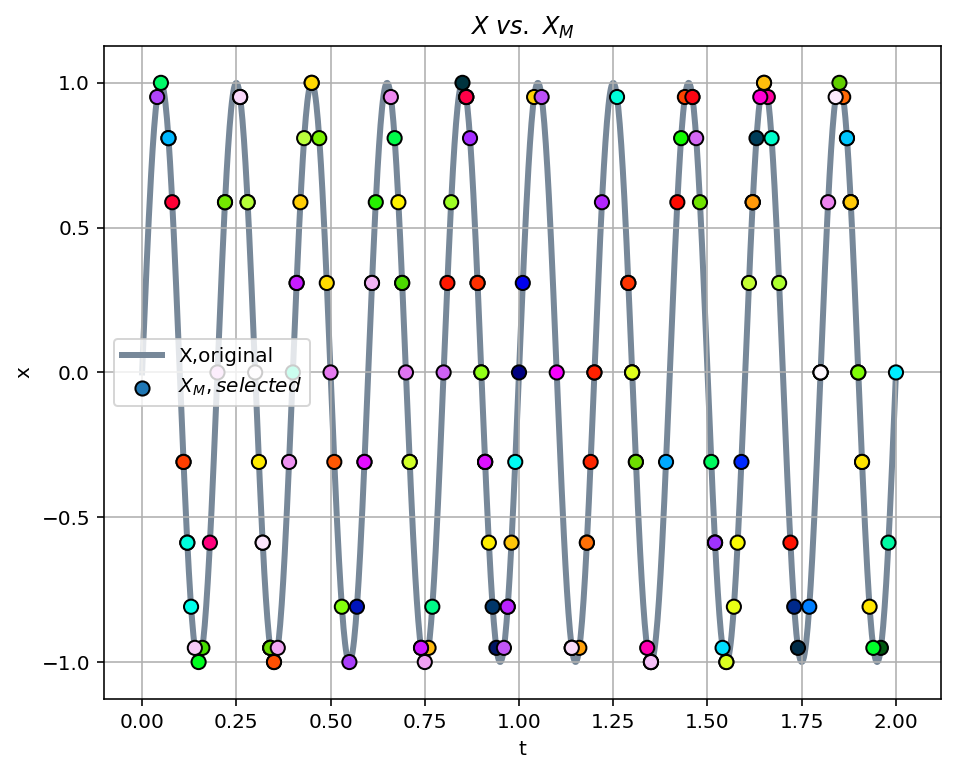

In [5]:
N = 201
A = 1.
nu = 5.
t0 = 0.,
dt = .01
t_array = np.zeros(N)
t_array[0] = 0.
for i in range(N-1):
    t_array[i+1] = t_array[i]+dt
x_array = A*np.sin(2*pi*nu*t_array)
ind = np.arange(201)
ind_choice = np.random.choice(ind,171)
t_M = t_array[ind_choice]
x_M = x_array[ind_choice]
m = np.arange(len(x_M))
t = np.linspace(0.,2.,1000)
f = lambda t: A*np.sin(2*pi*nu*t)
plt.figure(figsize=(7.5,6))
plt.plot(t,f(t),lw=3,color='lightslategray',zorder=1,label='X,original')
plt.scatter(t_M,x_M,c=m,cmap='gist_ncar',edgecolor='k',zorder=2,s=50,label=r'$X_M,selected$')
plt.xlabel('t')
plt.ylabel('x')
plt.title(r'$X \ vs. \ X_M$')
plt.legend()
plt.grid()
plt.show()

## (c)

203.783625731


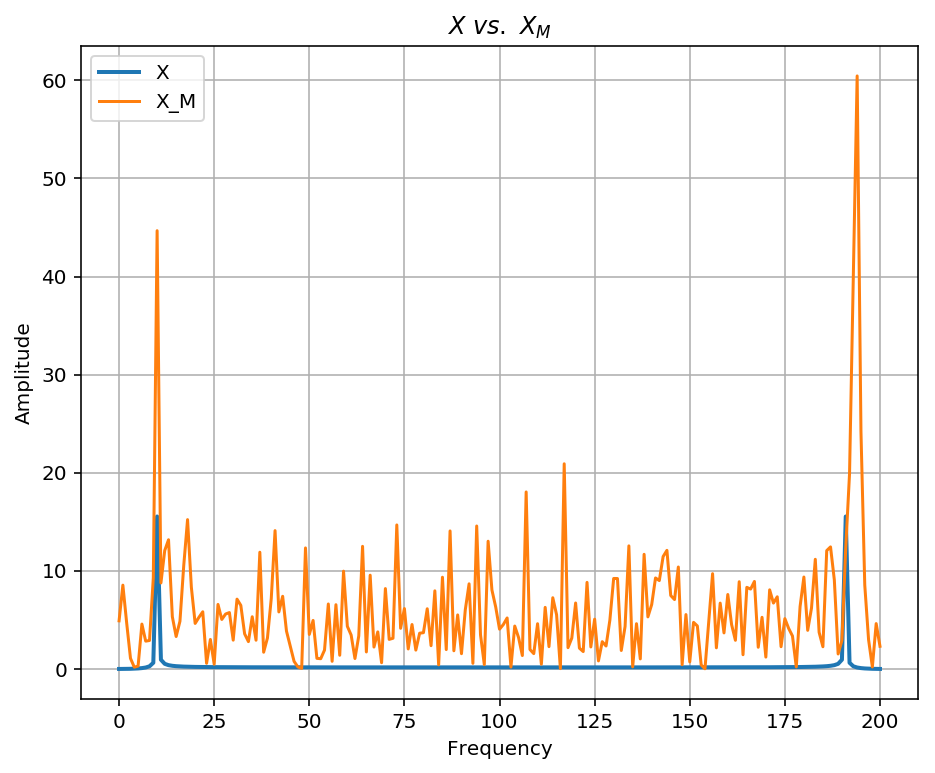

In [6]:
N_est = 2*np.mean(ind_choice)+1
print N_est
dnu = 1./(N*dt)
modes = np.arange(0,N)

def fft(x,indx,k,N):
    X = np.zeros(len(k))
    for i in range(len(k)):
        e_array = np.exp(-2*pi*1j*k[i]*indx/N)
        X[i] = np.sum(np.multiply(x,e_array)).real
    return np.abs(X)


plt.figure(figsize=(7.5,6))
plt.plot(modes,fft(x_array,np.arange(len(x_array)),modes,len(x_array)),lw=2,label='X')
plt.plot(modes,fft(x_M,ind_choice,modes,N_est),'-',label='X_M')
plt.xlabel('Frequency')
plt.ylabel('Amplitude')
plt.title(r'$X \ vs. \ X_M$')
plt.grid()
plt.legend()
plt.show()
    

## (a)

In [7]:
# define the function of ellipse
a=4.;b=3.
def f(x,a,b):
    return b*np.sqrt(1.-x*x/a**2)

# define any xmin-xmax interval 
xmin = -4.
xmax = 4.

# find ymin-ymax
numSteps = 1000000 # number of steps taken
ymin = f(xmin,a,b)
ymax = ymin
for i in range(numSteps):
    x = xmin + (xmax - xmin) * float(i) / numSteps
    y = f(x,a,b)
    if y < ymin: ymin = y
    if y > ymax: ymax = y

# Monte Carlo methods
rectArea = (xmax - xmin) * (ymax - ymin)
numPoints = 10000 # number of randomly generated points
ctr = 0.
for j in range(numPoints):
    x = xmin + (xmax - xmin) * random.random()
    y = ymin + (ymax - ymin) * random.random()
    if f(x,a,b) > 0 and y > 0 and y <= f(x,a,b):
        ctr += 1
    if f(x,a,b) < 0 and y < 0 and y >= f(x,a,b):
        ctr += 1

fnArea = rectArea * float(ctr) / numPoints
print "Area of the ellipse is estimated to be = " + str(fnArea*2)

Area of the ellipse is estimated to be = 37.8144


## (b)

In [8]:
@np.vectorize
def ellipse_est(N,a,b):
    # define any xmin-xmax interval 
    xmin = -a
    xmax = a

    # find ymin-ymax
    numSteps = 1000000 # number of steps taken
    ymin = f(xmin,a,b)
    ymax = ymin
    for i in range(numSteps):
        x = xmin + (xmax - xmin) * float(i) / numSteps
        y = f(x,a,b)
        if y < ymin: ymin = y
        if y > ymax: ymax = y

    # Monte Carlo methods
    rectArea = (xmax - xmin) * (ymax - ymin)
    ctr = 0.
    for j in range(N):
        x = xmin + (xmax - xmin) * random.random()
        y = ymin + (ymax - ymin) * random.random()
        if f(x,a,b) > 0 and y > 0 and y <= f(x,a,b):
            ctr += 1
        if f(x,a,b) < 0 and y < 0 and y >= f(x,a,b):
            ctr += 1

    fnArea = rectArea * float(ctr) / N
    return fnArea*2


In [9]:
N = np.array([100,1000,10000,100000,1000000])
area = ellipse_est(N,4,3)

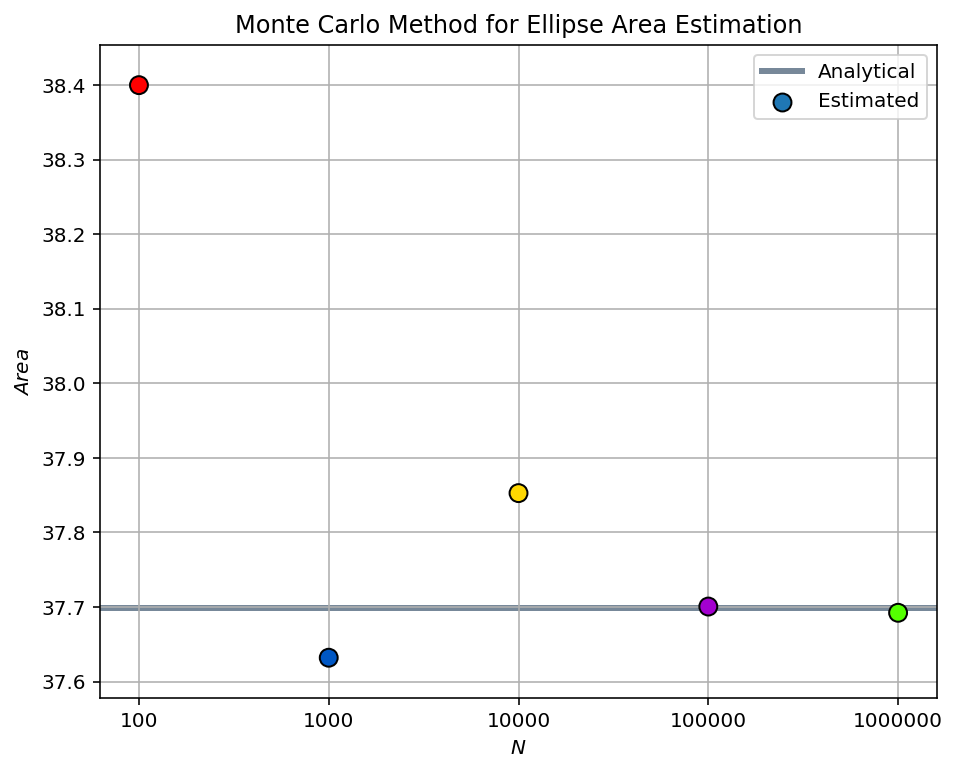

In [10]:
m = np.arange(len(N))
plt.figure(figsize=(7.5,6))
plt.scatter(np.log(N),area,c=m,marker='o',edgecolor='k',s=80,cmap='prism',zorder=2,alpha=1,label='Estimated')
plt.axhline(y=pi*a*b,lw=3,color='lightslategray',zorder=1,label='Analytical')
plt.title('Monte Carlo Method for Ellipse Area Estimation')
plt.xticks(np.log(N),['100','1000','10000','100000','1000000'])
plt.xlabel(r'$N$')
plt.ylabel(r'$Area$')
plt.legend()
plt.grid()
plt.show()

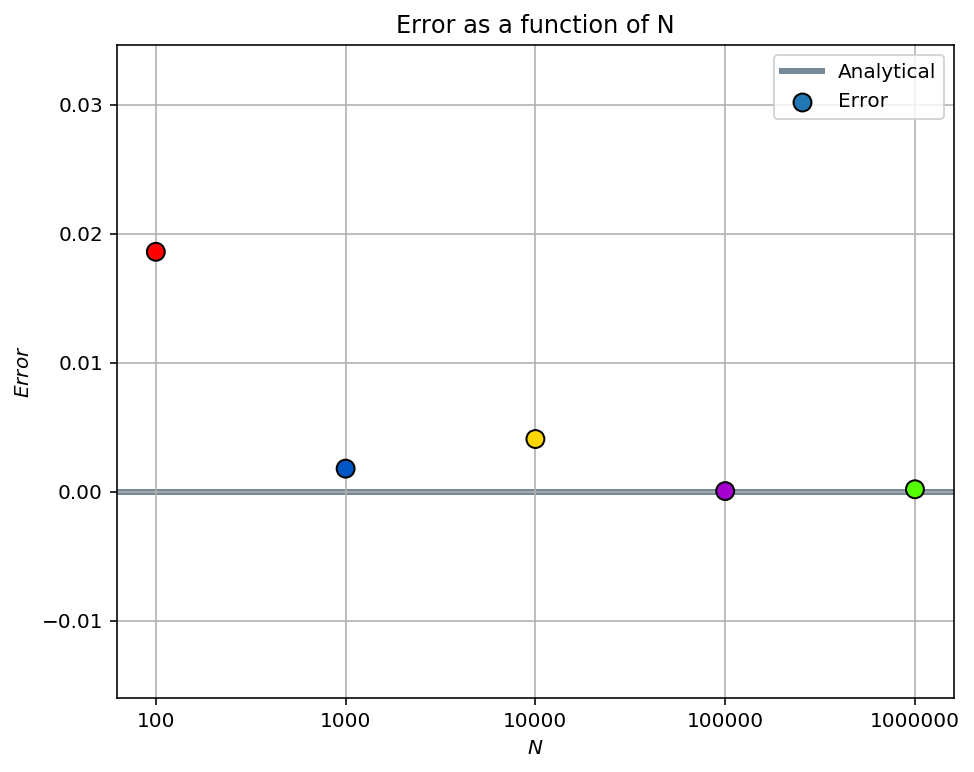

In [11]:
plt.figure(figsize=(7.5,6))
plt.scatter(np.log(N),np.abs(area-(pi*a*b))/(pi*a*b),c=m,marker='o',edgecolor='k',s=80,cmap='prism',zorder=2,alpha=1,label='Error')
plt.axhline(y=0.,lw=3,color='lightslategray',zorder=1,label='Analytical')
plt.title('Error as a function of N')
plt.xticks(np.log(N),['100','1000','10000','100000','1000000'])
plt.xlabel(r'$N$')
plt.ylabel(r'$Error$')
plt.legend()
plt.grid()
plt.show()

It can be seen from the above two plots, with the increase of $N$, the estimated value gets closer and closer to the analytical one, and the error decreases as $N$ gets larger and larger.